In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

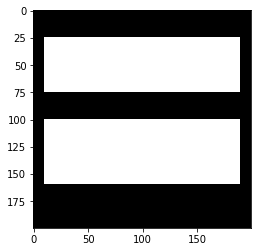

In [4]:
img = np.zeros((200,200),np.uint8)
img[25:75,10:190] = 255
img[100:160,10:190] = 255
# img = cv2.resize(img,(0,0), fx=1780/200, fy=1900/200, interpolation = cv2.INTER_AREA)
img[img>0] = 255
plt.imshow(img,'gray')

In [5]:
cv2.imwrite("img.png",img)

True

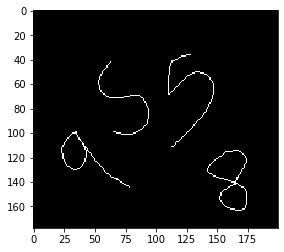

In [10]:
img = cv2.imread('test.png',0)
img[img > 127] = 150
img[img < 127] = 1
img[img == 150] = 0
plt.imshow(img,'gray')

In [12]:
import math
def checkAdjacent(ind1,ind2):
    x1,y1 = ind1
    x2,y2 = ind2
    dis = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return (dis < 2)

In [ ]:
class Line:
    def __init__(self,head):
        self.head = head
        self.last = head
        self.data = [self.head]

    def add(self,item):
        self.data.append(item)

    def checkLast():
        return self.data[-1]

In [27]:
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))
points = []
lines = []


for i in range(len(indexes)):
    if not indexes[i] in points: points.append(indexes[i])
    for j, point in enumerate(indexes):
        if (not points[-1] ==  indexes[j]) and checkAdjacent(points[-1],indexes[j]) and (not indexes[i] in points):
            points.append(indexes[j])
# for i,index in enumerate(indexes):
#     for j in range(i+1,len(indexes)):
#         if checkAdjacent(index,indexes[j]):
#             points.append(indexes[j])

head = 0
for i,point in enumerate(points):
    if not head:
        head =  i
    elif i < len(points)-1 and (not checkAdjacent(point,points[i+1])):
        lines.append(points[head:i+1])
        head = None

print(lines)


[[(36, 126), (36, 127), (36, 128)], [(37, 121), (37, 122), (37, 123), (37, 124)], [(38, 119), (38, 120)], [(39, 118), (40, 116), (40, 117)], [(41, 113), (41, 114), (41, 115)], [(42, 63), (42, 113)], [(43, 62), (43, 112)], [(44, 61), (44, 112)], [(45, 60), (45, 112)], [(46, 60), (46, 111)], [(47, 59), (47, 111)], [(48, 58), (48, 111)], [(49, 57), (49, 111)], [(50, 56), (50, 111)], [(50, 132), (50, 133), (50, 134), (50, 135)], [(51, 56), (51, 111)], [(51, 130), (51, 131)], [(51, 136), (51, 137), (51, 138), (51, 139)], [(52, 55), (52, 111)], [(52, 128), (52, 129)], [(52, 140), (52, 141)], [(53, 55), (53, 110)], [(53, 126), (53, 127)], [(53, 142), (54, 54)], [(54, 110), (54, 125)], [(54, 143), (55, 54)], [(55, 110), (55, 124)], [(55, 144), (56, 54)], [(56, 110), (56, 123)], [(56, 144), (57, 53)], [(57, 110), (57, 122)], [(57, 145), (58, 53)], [(58, 110), (58, 121)], [(58, 146), (59, 53)], [(59, 110), (59, 120)], [(59, 146), (60, 53)], [(60, 110), (60, 119)], [(60, 147), (61, 54)], [(61, 11

In [7]:
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))
lines = []
for index in indexes:
    if lines:
        line = lines[-1]
        if line["end"]:
            if checkAdjacent(line["end"],index):
                lines[-1]["end"] = index
            else:
                lines.append({"start":index,"end":None})
        else:
            lines[-1]["end"] = index
    else:
        lines.append({"start": index,"end":None})

In [10]:
for line in lines:
    print(line)

{'start': (25, 10), 'end': (25, 189)}
{'start': (26, 10), 'end': (26, 189)}
{'start': (27, 10), 'end': (27, 189)}
{'start': (28, 10), 'end': (28, 189)}
{'start': (29, 10), 'end': (29, 189)}
{'start': (30, 10), 'end': (30, 189)}
{'start': (31, 10), 'end': (31, 189)}
{'start': (32, 10), 'end': (32, 189)}
{'start': (33, 10), 'end': (33, 189)}
{'start': (34, 10), 'end': (34, 189)}
{'start': (35, 10), 'end': (35, 189)}
{'start': (36, 10), 'end': (36, 189)}
{'start': (37, 10), 'end': (37, 189)}
{'start': (38, 10), 'end': (38, 189)}
{'start': (39, 10), 'end': (39, 189)}
{'start': (40, 10), 'end': (40, 189)}
{'start': (41, 10), 'end': (41, 189)}
{'start': (42, 10), 'end': (42, 189)}
{'start': (43, 10), 'end': (43, 189)}
{'start': (44, 10), 'end': (44, 189)}
{'start': (45, 10), 'end': (45, 189)}
{'start': (46, 10), 'end': (46, 189)}
{'start': (47, 10), 'end': (47, 189)}
{'start': (48, 10), 'end': (48, 189)}
{'start': (49, 10), 'end': (49, 189)}
{'start': (50, 10), 'end': (50, 189)}
{'start': (5

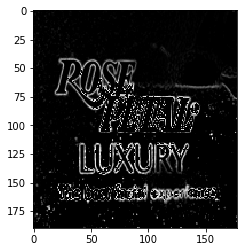

In [13]:
gimg = cv2.imread("index.jpeg",0)
igimg = 255 - gimg
blurred_img = cv2.GaussianBlur(igimg, (21,21),0)
inv_blurred_img = 255 - blurred_img
pencil_sketch_img = cv2.divide(gimg,inv_blurred_img, scale = 256.0)
pencil_sketch_img = cv2.bitwise_not(pencil_sketch_img)
pencil_sketch_img[pencil_sketch_img>127] = 255
img = pencil_sketch_img
img = cv2.medianBlur(img,11)
img_y, img_x = img.shape[:2]
img = cv2.resize(img,(0,0), fx=178/img_x, fy=190/img_y, interpolation = cv2.INTER_AREA)
img[img > 127] =1
plt.imshow(img,'gray')

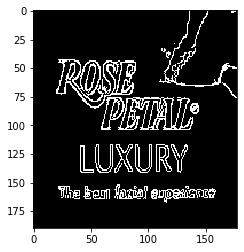

In [7]:
# Convert to black and white
oimg = cv2.imread("index.jpeg")
img_y, img_x = oimg.shape[:2]
oimg = cv2.resize(oimg, (0,0), fx=178/img_x, fy=190/img_y, interpolation = cv2.INTER_AREA) #common
gimg = cv2.cvtColor(oimg,cv2.COLOR_BGR2GRAY)
(thresh, bwimg) = cv2.threshold(gimg, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# thresh = 127
# bwimg= cv2.threshold(gimg, thresh, 255, cv2.THRESH_BINARY)[1]


# Edge Detection
imgBlurredColour = cv2.GaussianBlur(oimg, (7,7),0) #blurs to soften edges, really sure how effetive this is yet
imgBlurredBlackWhite = cv2.GaussianBlur(bwimg, (7,7),0)

imgOutlinedColour = cv2.Canny(imgBlurredColour, 100, 200) #for colour 
#processes and outputs an image, 100 200 is the ratio for acceptable edge gradation 
imgOutlinedBlackWhite = cv2.Canny(imgBlurredBlackWhite, 100, 200) #for black and white
imgOutlinedGrayscale = cv2.Canny(gimg, 100, 200)
#so that we can merge all three together to get better acuracy of the image

imgOutlinedTemp = cv2.addWeighted(imgOutlinedBlackWhite,1,imgOutlinedColour,1,0) #merges two photos together
img = cv2.addWeighted(imgOutlinedTemp,1,imgOutlinedGrayscale,1,0)#merges a third to it
img[img > 0] =1
plt.imshow(img,'gray')